In [1]:
import pandas as pd
file_path = "C:\\Users\\santh\\OneDrive\\Desktop\\Phase-1 L-10\\Task 1\\Titanic.csv"
titanic_df = pd.read_csv(file_path)
titanic_df.info(), titanic_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


(None,
    PassengerId  Survived  Pclass  \
 0          892         0       3   
 1          893         1       3   
 2          894         0       2   
 3          895         0       3   
 4          896         1       3   
 
                                            Name     Sex   Age  SibSp  Parch  \
 0                              Kelly, Mr. James    male  34.5      0      0   
 1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
 2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
 3                              Wirz, Mr. Albert    male  27.0      0      0   
 4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   
 
     Ticket     Fare Cabin Embarked  
 0   330911   7.8292   NaN        Q  
 1   363272   7.0000   NaN        S  
 2   240276   9.6875   NaN        Q  
 3   315154   8.6625   NaN        S  
 4  3101298  12.2875   NaN        S  )

In [2]:
descriptive_stats = titanic_df.describe()
modes = titanic_df.mode().iloc[0]
descriptive_stats, modes


(       PassengerId    Survived      Pclass         Age       SibSp  \
 count   418.000000  418.000000  418.000000  332.000000  418.000000   
 mean   1100.500000    0.363636    2.265550   30.272590    0.447368   
 std     120.810458    0.481622    0.841838   14.181209    0.896760   
 min     892.000000    0.000000    1.000000    0.170000    0.000000   
 25%     996.250000    0.000000    1.000000   21.000000    0.000000   
 50%    1100.500000    0.000000    3.000000   27.000000    0.000000   
 75%    1204.750000    1.000000    3.000000   39.000000    1.000000   
 max    1309.000000    1.000000    3.000000   76.000000    8.000000   
 
             Parch        Fare  
 count  418.000000  417.000000  
 mean     0.392344   35.627188  
 std      0.981429   55.907576  
 min      0.000000    0.000000  
 25%      0.000000    7.895800  
 50%      0.000000   14.454200  
 75%      0.000000   31.500000  
 max      9.000000  512.329200  ,
 PassengerId                              892
 Survived      

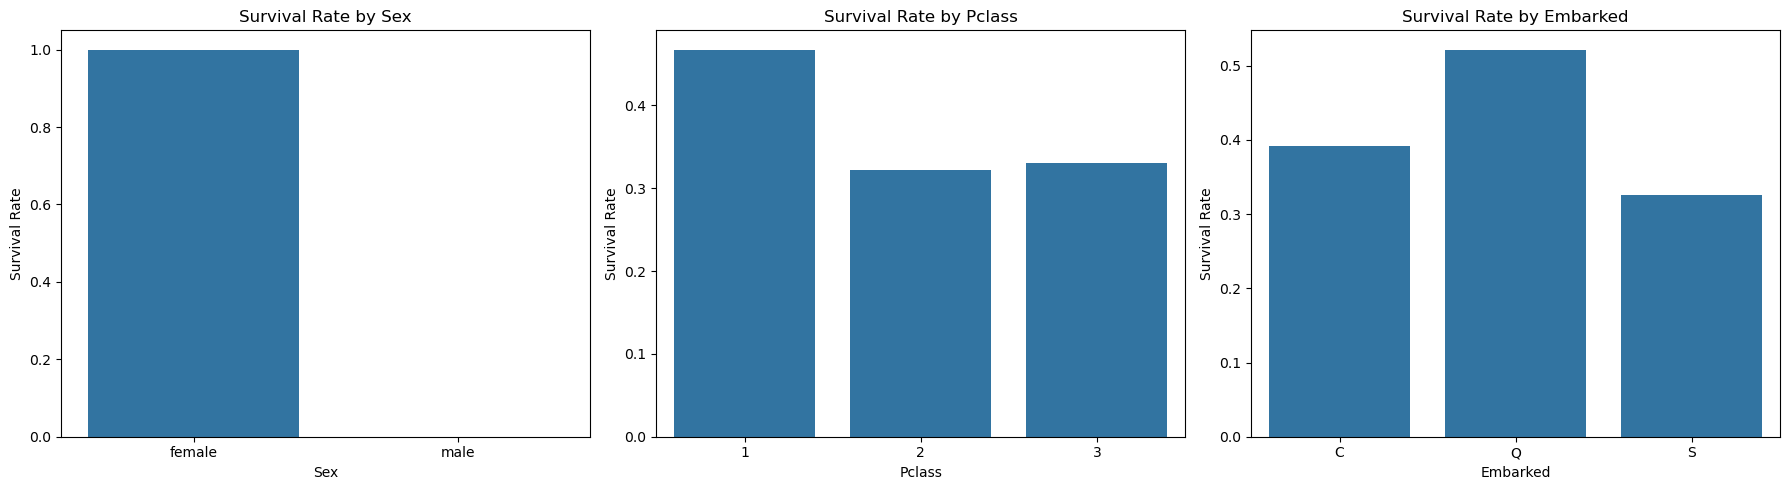

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
survival_by_sex = titanic_df.groupby("Sex")["Survived"].mean()
survival_by_pclass = titanic_df.groupby("Pclass")["Survived"].mean()
survival_by_embarked = titanic_df.groupby("Embarked")["Survived"].mean()
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.barplot(x=survival_by_sex.index, y=survival_by_sex.values, ax=axes[0])
axes[0].set_title("Survival Rate by Sex")
axes[0].set_ylabel("Survival Rate")
sns.barplot(x=survival_by_pclass.index.astype(str), y=survival_by_pclass.values, ax=axes[1])
axes[1].set_title("Survival Rate by Pclass")
axes[1].set_ylabel("Survival Rate")
sns.barplot(x=survival_by_embarked.index, y=survival_by_embarked.values, ax=axes[2])
axes[2].set_title("Survival Rate by Embarked")
axes[2].set_ylabel("Survival Rate")
plt.tight_layout()
plt.show()


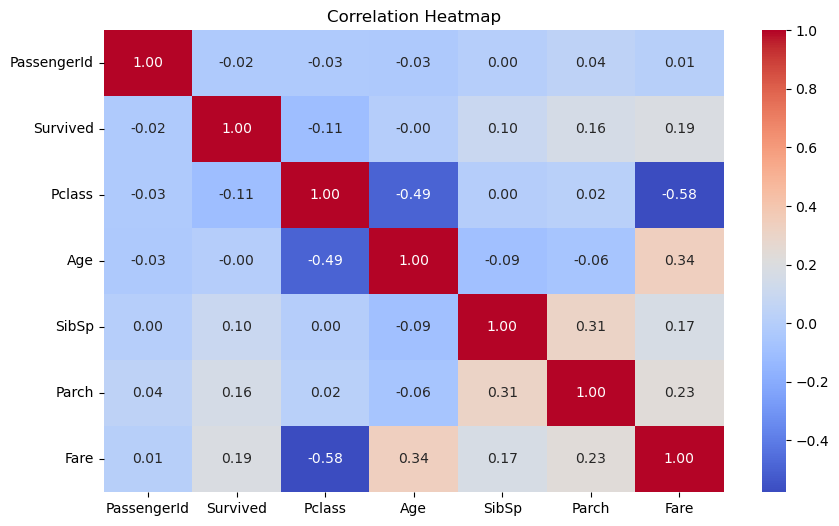

In [4]:
numeric_df = titanic_df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
